In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
start_date = '2021-01-01'
end_date = '2022-12-31'

In [16]:
stocks = ['TSLA', 'AMD', 'NVDA', 'SQ', 'ROKU']

In [17]:
data = yf.download(stocks, start=start_date, end=end_date)
prices = data['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [19]:
moving_averages = prices.rolling(window=200, min_periods=1).mean()

In [24]:
def buy_the_dip(prices, moving_averages, drop_threshold=0.20, profit_threshold=0.05):
    positions = {stock: {'holding': False, 'buy_price': 0} for stock in prices.columns}
    cash = 100000  # Starting capital
    portfolio_value = []
    holdings = {stock: 0 for stock in prices.columns}
    dates = prices.index

    for date in dates:
        for stock in prices.columns:
            price = prices.loc[date, stock]
            ma = moving_averages.loc[date, stock]
            if pd.notna(price) and pd.notna(ma):
                drop = (ma - price) / ma

                if not positions[stock]['holding'] and drop >= drop_threshold:
                    # Buy signal
                    amount_to_invest = cash * 0.2
                    shares_to_buy = amount_to_invest // price
                    if shares_to_buy > 0:
                        cash -= shares_to_buy * price
                        holdings[stock] += shares_to_buy
                        positions[stock]['holding'] = True
                        positions[stock]['buy_price'] = price
                        print(f"{date.date()}: Bought {shares_to_buy} shares of {stock} at ${price:.2f}")

                elif positions[stock]['holding']:
                    profit = (price - positions[stock]['buy_price']) / positions[stock]['buy_price']
                    if profit >= profit_threshold:
                        # Sell signal
                        shares_to_sell = holdings[stock]
                        cash += shares_to_sell * price
                        holdings[stock] = 0
                        positions[stock]['holding'] = False
                        print(f"{date.date()}: Sold {shares_to_sell} shares of {stock} at ${price:.2f}")

        # Calculate total portfolio value
        total_value = cash + sum(holdings[stock] * prices.loc[date, stock] for stock in holdings)
        portfolio_value.append(total_value)

    # Create a DataFrame for portfolio value over time
    portfolio_df = pd.DataFrame({'Date': dates, 'Portfolio Value': portfolio_value})
    portfolio_df.set_index('Date', inplace=True)
    return portfolio_df

In [41]:
portfolio_df = buy_the_dip(prices, moving_averages, drop_threshold=0.05, profit_threshold=0.05)

2021-01-15: Bought 226.0 shares of AMD at $88.21
2021-01-22: Sold 226.0 shares of AMD at $92.79
2021-01-26: Bought 96.0 shares of SQ at $209.17
2021-01-28: Sold 96.0 shares of SQ at $219.91
2021-01-29: Bought 238.0 shares of AMD at $85.64
2021-02-08: Sold 238.0 shares of AMD at $91.47
2021-02-18: Bought 78.0 shares of TSLA at $262.46
2021-02-22: Bought 194.0 shares of AMD at $85.37
2021-02-25: Bought 34.0 shares of ROKU at $382.34
2021-03-01: Sold 34.0 shares of ROKU at $420.31
2021-03-02: Bought 34.0 shares of ROKU at $389.67
2021-03-03: Bought 852.0 shares of NVDA at $12.77
2021-03-04: Bought 39.0 shares of SQ at $218.41
2021-03-11: Sold 39.0 shares of SQ at $241.72
2021-03-18: Bought 39.0 shares of SQ at $224.30
2021-04-01: Sold 852.0 shares of NVDA at $13.78
2021-04-06: Sold 39.0 shares of SQ at $236.50
2021-05-06: Bought 50.0 shares of SQ at $223.96
2021-06-17: Sold 50.0 shares of SQ at $236.13
2021-06-23: Sold 34.0 shares of ROKU at $421.70
2021-06-30: Sold 194.0 shares of AMD at

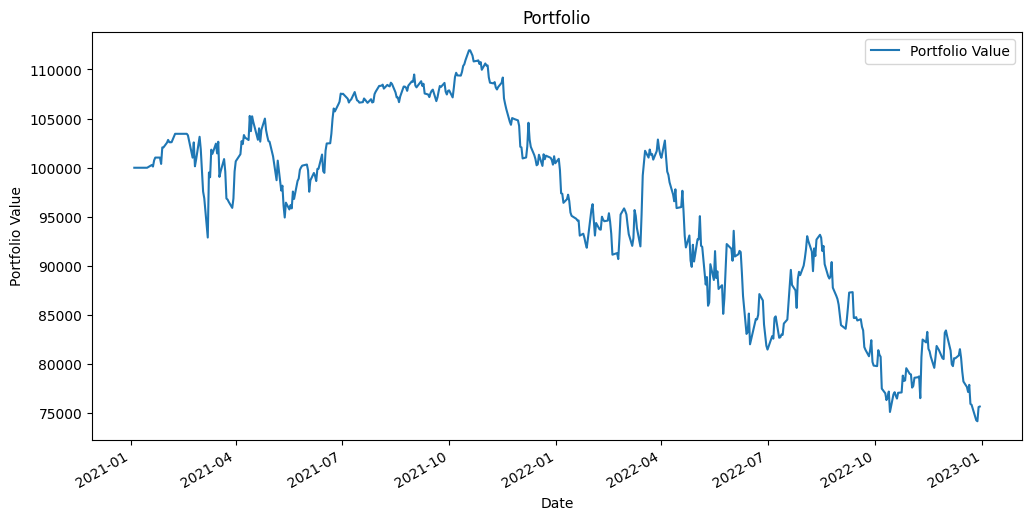

In [42]:
portfolio_df.plot(figsize=(12, 6))
plt.title('Portfolio')
plt.ylabel('Portfolio Value')
plt.show()

In [43]:
initial_value = portfolio_df['Portfolio Value'].iloc[0]
final_value = portfolio_df['Portfolio Value'].iloc[-1]
total_return = (final_value - initial_value) / initial_value * 100
print(f"Total Return: {total_return:.2f}%")

Total Return: -24.30%
